In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
%matplotlib inline
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
df = pd.read_csv(r'C:\Users\showi\Downloads\powerlifting-database\openpowerlifting.csv')
#df = df.drop(columns='Unnamed: 0')

df.head()

Name Sex Event Equipment   Age AgeClass Division  BodyweightKg  \
0     Abbie Murphy   F   SBD     Wraps  29.0    24-34     F-OR          59.8   
1      Abbie Tuong   F   SBD     Wraps  29.0    24-34     F-OR          58.5   
2   Ainslee Hooper   F     B       Raw  40.0    40-44     F-OR          55.4   
3  Amy Moldenhauer   F   SBD     Wraps  23.0    20-23     F-OR          60.0   
4     Andrea Rowan   F   SBD     Wraps  45.0    45-49     F-OR         104.0   

  WeightClassKg  Squat1Kg  ...  McCulloch  Glossbrenner  IPFPoints  Tested  \
0            60      80.0  ...     324.16        286.42     511.15     NaN   
1            60     100.0  ...     378.07        334.16     595.65     NaN   
2            56       NaN  ...      38.56         34.12     313.97     NaN   
3            60    -105.0  ...     345.61        305.37     547.04     NaN   
4           110     120.0  ...     338.91        274.56     550.08     NaN   

   Country  Federation        Date  MeetCountry  MeetState       MeetName  
0      NaN     GPC-AUS  2018-10-27    Australia        VIC  Melbourne Cup  
1      NaN     GPC-AUS  2018-10-27    Australia        VIC  Melbourne Cup  
2      NaN     GPC-AUS  2018-10-27    Australia        VIC  Melbourne Cup  
3      NaN     GPC-AUS  2018-10-27    Australia        VIC  Melbourne Cup  
4      NaN     GPC-AUS  2018-10-27    Australia        VIC  Melbourne Cup  

[5 rows x 37 columns]

In [27]:
df.shape

(1423354, 37)

In [26]:
df.isna().sum()

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

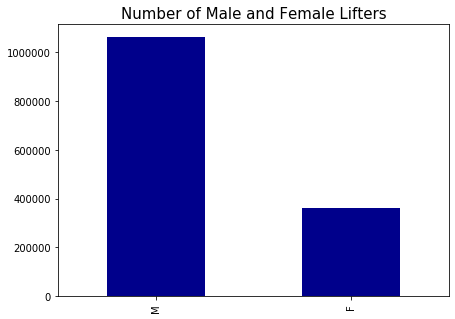

In [41]:
plt.figure(figsize=(7, 5))
df['Sex'].value_counts().plot(kind='bar', color='darkblue');
plt.title('Number of Male and Female Lifters', fontsize=15);

In [47]:
df['Equipment'] = df['Equipment'].replace('Straps', 'Wraps')
df['Equipment'].value_counts()

Single-ply    787141
Raw           467421
Wraps         103757
Multi-ply      65035
Name: Equipment, dtype: int64

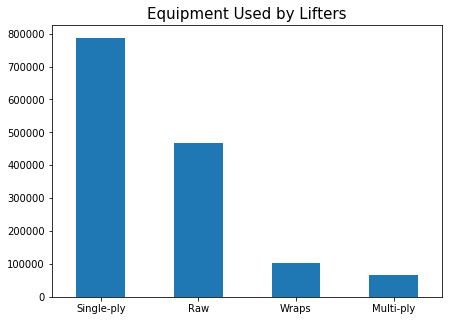

In [49]:
plt.figure(figsize=(7, 5))
df['Equipment'].value_counts().plot(kind='bar', rot=0);
plt.title('Equipment Used by Lifters', fontsize=15);

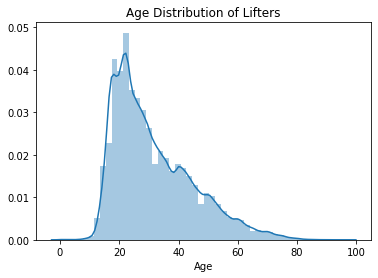

In [119]:
sns.distplot(df['Age'].dropna())
plt.title('Age Distribution of Lifters')
plt.show()

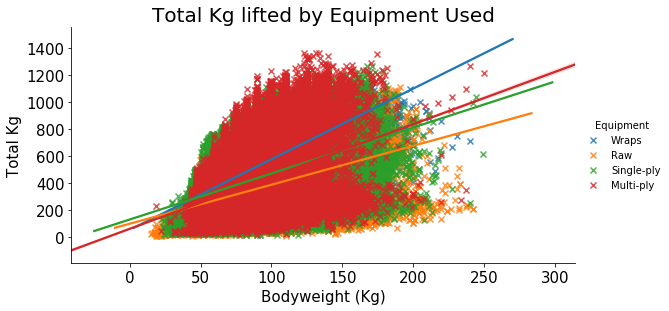

In [61]:
sns.lmplot(x='BodyweightKg', 
           y='TotalKg', 
           data=df,
           hue='Equipment',
           markers='x',
           size=4,
           aspect=2)
plt.title('Total Kg lifted by Equipment Used', fontsize=20)
plt.ylabel('Total Kg', fontsize=15)
plt.xlabel('Bodyweight (Kg)', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [66]:
mask = df.columns.drop(['Name','Event', 'Division', 'MeetCountry', 'MeetState', 'MeetName',
                      'Tested', 'Country', 'Federation', 'Place', 'Wilks', 'McCulloch',
                      'Glossbrenner', 'IPFPoints', 'Date', 'WeightClassKg', 'AgeClass'])
df1 = df[mask]
df1.head()

Sex Equipment   Age  BodyweightKg  Squat1Kg  Squat2Kg  Squat3Kg  Squat4Kg  \
0   F     Wraps  29.0          59.8      80.0      92.5     105.0       NaN   
1   F     Wraps  29.0          58.5     100.0     110.0     120.0       NaN   
2   F       Raw  40.0          55.4       NaN       NaN       NaN       NaN   
3   F     Wraps  23.0          60.0    -105.0    -105.0     105.0       NaN   
4   F     Wraps  45.0         104.0     120.0     130.0     140.0       NaN   

   Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Bench4Kg  Best3BenchKg  \
0         105.0      45.0      50.0      55.0       NaN          55.0   
1         120.0      55.0      62.5      67.5       NaN          67.5   
2           NaN      27.5      32.5     -35.0       NaN          32.5   
3         105.0      67.5      72.5     -75.0       NaN          72.5   
4         140.0      70.0      75.0      80.0       NaN          80.0   

   Deadlift1Kg  Deadlift2Kg  Deadlift3Kg  Deadlift4Kg  Best3DeadliftKg  \
0        110.0        120.0        130.0          NaN            130.0   
1        130.0        140.0        145.0          NaN            145.0   
2          NaN          NaN          NaN          NaN              NaN   
3        132.5       -140.0       -140.0          NaN            132.5   
4        150.0        160.0        170.0          NaN            170.0   

   TotalKg  
0    290.0  
1    332.5  
2     32.5  
3    310.0  
4    390.0

In [ ]:
#df.to_csv('file6.csv')

In [88]:
df2 = df[df.columns.drop(['Name', 'Squat4Kg', 'Bench4Kg', 'Deadlift4Kg', 'Country'])]
df2.shape

(1423354, 32)

In [92]:
df2 = df2.dropna(subset=['TotalKg'])
df2.shape

(1313184, 32)

C:\Users\showi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\showi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


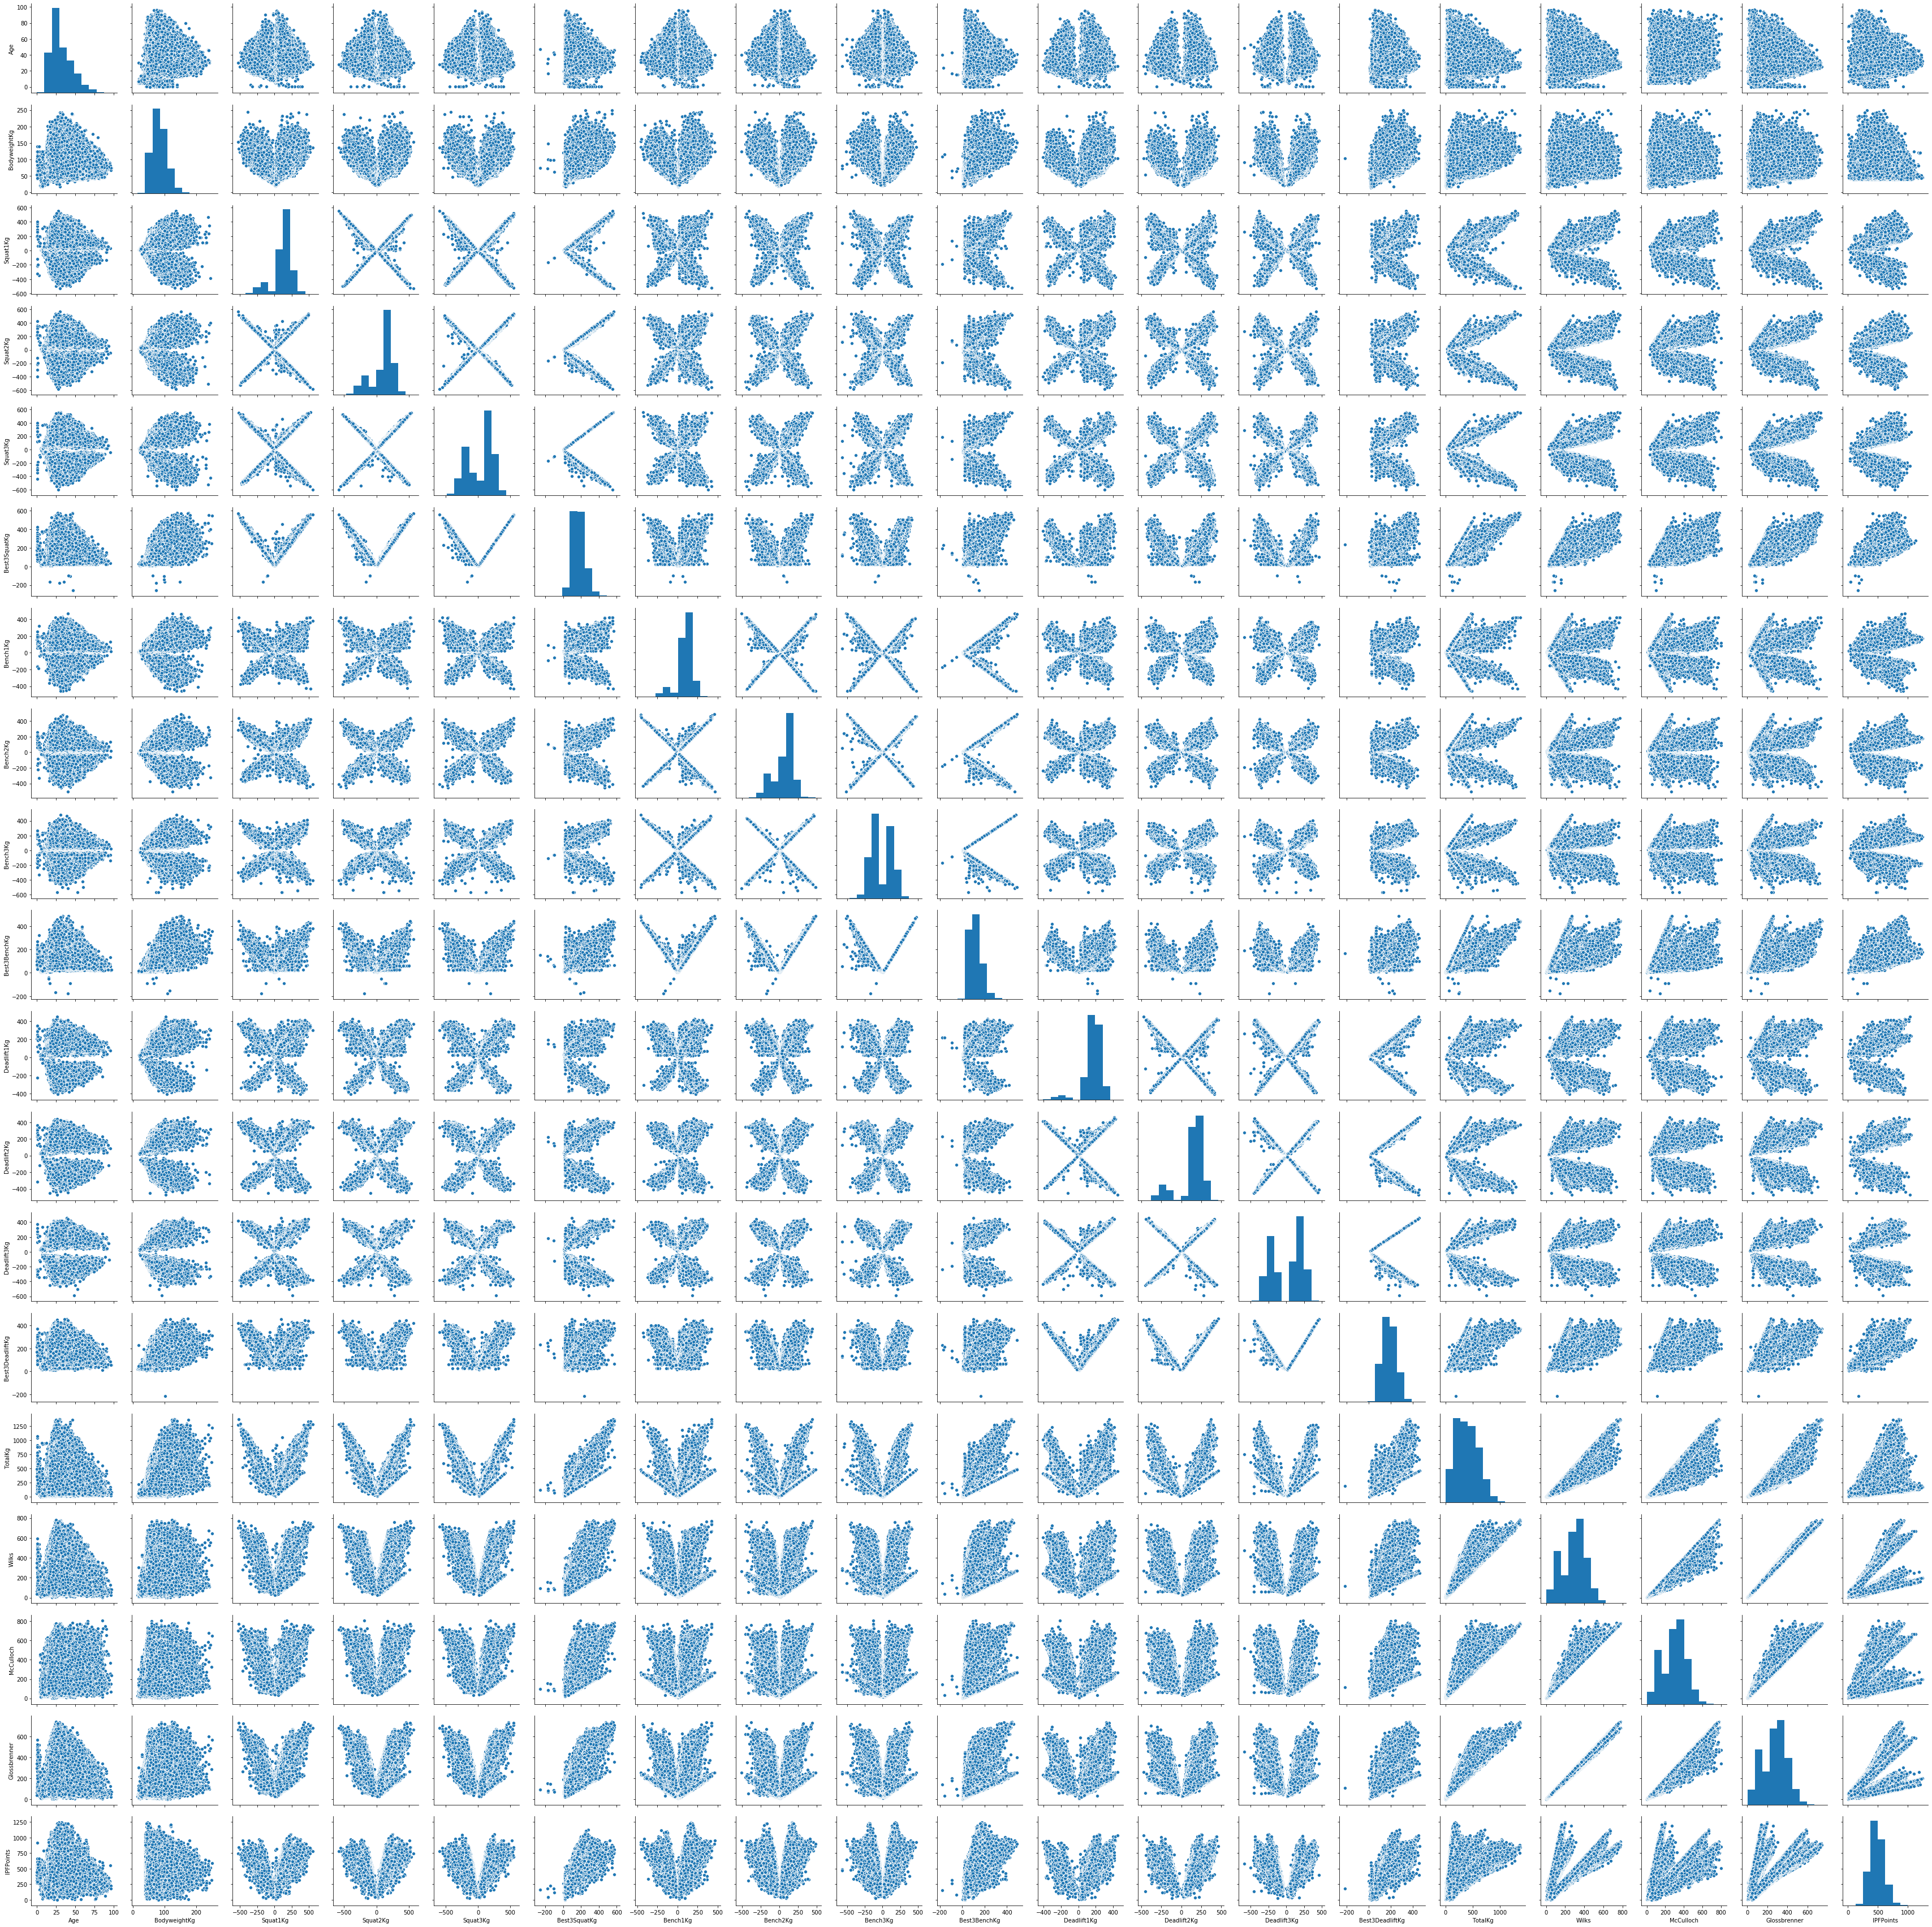

In [117]:
sns.pairplot(df2)

In [94]:
train, val = train_test_split(df2, train_size = 0.80, test_size=0.20, random_state=42)
print(train.shape)
val.shape

(1050547, 32)


(262637, 32)

In [96]:
target = 'TotalKg'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [112]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

In [109]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [116]:
pred = model.predict(X_val_transformed)
mae = mean_absolute_error(y_val, pred)
print(mae)

0.4136829946743377


In [110]:
permuter = PermutationImportance(model,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=2,
                                 random_state=42
                                )

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()

eli5.show_weights(permuter,
                  top=None,
                  feature_names=feature_names)